In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
df = pd.read_csv("C:/Users/vipul/Desktop/Predictive Analytics/Crash_Reporting_-_Drivers_Data.csv")
print("Dataset loaded successfully")
print("Shape of dataset:", df.shape)
print(df.head())

C:\Users\vipul\AppData\Local\Temp\ipykernel_740\2299970654.py:1: DtypeWarning: Columns (1,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/vipul/Desktop/Predictive Analytics/Crash_Reporting_-_Drivers_Data.csv")


Dataset loaded successfully
Shape of dataset: (207084, 39)
  Report Number Local Case Number Agency Name       ACRS Report Type  \
0   MCP3296002G         240018653  MONTGOMERY  Property Damage Crash   
1   MCP276700BF         240012321  MONTGOMERY  Property Damage Crash   
2   MCP32790038         240022955  MONTGOMERY  Property Damage Crash   
3   MCP34000014         240019831  MONTGOMERY  Property Damage Crash   
4   MCP3341003F         240011829  MONTGOMERY           Injury Crash   

          Crash Date/Time              Route Type             Road Name  \
0  04/21/2024 06:53:00 PM            County Route                   NaN   
1  03/14/2024 05:23:00 PM              US (State)  COLUMBIA PIKE (SB/L)   
2  05/15/2024 07:30:00 AM  Maryland (State) Route  VEIRS MILL RD (WB/L)   
3  04/28/2024 05:30:00 PM            County Route            HARDING DR   
4  03/12/2024 07:30:00 AM           Private Route                   NaN   

  Cross-Street Name Off-Road Description Municipality  ..

In [14]:
print(df.info())
print("\nColumn Names:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207084 entries, 0 to 207083
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  207084 non-null  object 
 1   Local Case Number              207084 non-null  object 
 2   Agency Name                    207084 non-null  object 
 3   ACRS Report Type               207084 non-null  object 
 4   Crash Date/Time                207084 non-null  object 
 5   Route Type                     186836 non-null  object 
 6   Road Name                      183493 non-null  object 
 7   Cross-Street Name              168967 non-null  object 
 8   Off-Road Description           19208 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6768 non-null    object 
 11  Collision Type                 206499 non-null  object 
 12  Weather                       

In [15]:
df.drop(columns=[
    "Agency Name",
    "ACRS Report Type",
    "Road Name",
    "Cross-Street Name",
    "Off-Road Description",
    "Municipality",
    "Person ID",
    "Vehicle ID",
    "Location",
    "Latitude",
    "Longitude"
], errors="ignore", inplace=True)


In [16]:

# Handling missing values

num_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")


df.isnull().sum()


Report Number                    0
Local Case Number                0
Crash Date/Time                  0
Route Type                       0
Related Non-Motorist             0
Collision Type                   0
Weather                          0
Surface Condition                0
Light                            0
Traffic Control                  0
Driver Substance Abuse           0
Non-Motorist Substance Abuse     0
Driver At Fault                  0
Injury Severity                  0
Circumstance                     0
Driver Distracted By             0
Drivers License State            0
Vehicle Damage Extent            0
Vehicle First Impact Location    0
Vehicle Body Type                0
Vehicle Movement                 0
Vehicle Going Dir                0
Speed Limit                      0
Driverless Vehicle               0
Parked Vehicle                   0
Vehicle Year                     0
Vehicle Make                     0
Vehicle Model                    0
dtype: int64

# Objective 1  

Injury Severity Prediction
(Model: Logistic Regression )

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = df[col].astype(str)   # 🔑 KEY FIX
    df[col] = le.fit_transform(df[col])


In [18]:
feature_cols = [
    "Collision Type",
    "Weather",
    "Surface Condition",
    "Light",
    "Traffic Control",
    "Driver Substance Abuse",
    "Driver Distracted By",
    "Driver At Fault",
    "Vehicle Damage Extent"
]

X = df[feature_cols]


In [19]:
df["Injury_Binary"] = df["Injury Severity"].apply(
    lambda x: 0 if x in [0, "No Apparent Injury"] else 1
)

y1 = df["Injury_Binary"]


In [20]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y1, test_size=0.2, random_state=42
)


In [21]:
model1 = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model1.fit(X_train1, y_train1)

y_pred1 = model1.predict(X_test1)


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("OBJECTIVE 1: Injury Severity Prediction")
print("Accuracy:", accuracy_score(y_test1, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred1))
print("Classification Report:\n", classification_report(y_test1, y_pred1))

OBJECTIVE 1: Injury Severity Prediction
Accuracy: 0.910374966801072
Confusion Matrix:
 [[   32     2]
 [ 3710 37673]]
Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.94      0.02        34
           1       1.00      0.91      0.95     41383

    accuracy                           0.91     41417
   macro avg       0.50      0.93      0.48     41417
weighted avg       1.00      0.91      0.95     41417



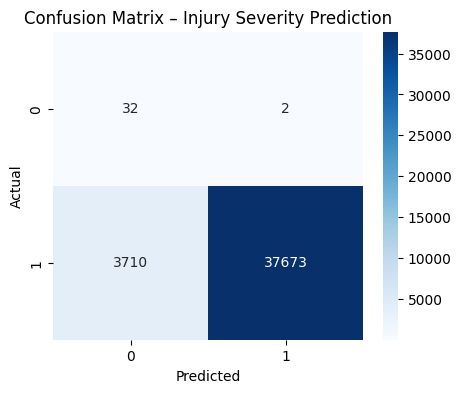

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test1, y_pred1),
            annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Injury Severity Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


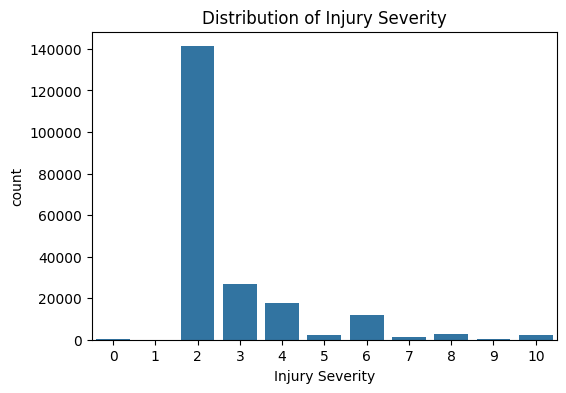

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x="Injury Severity", data=df)
plt.title("Distribution of Injury Severity")
plt.show()


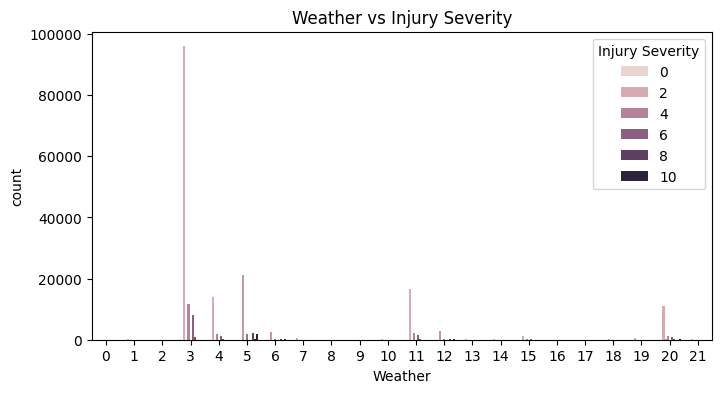

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x="Weather", hue="Injury Severity", data=df)
plt.title("Weather vs Injury Severity")
plt.show()


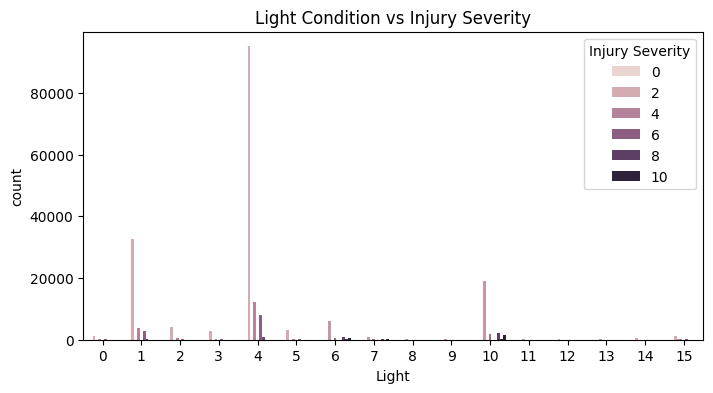

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(x="Light", hue="Injury Severity", data=df)
plt.title("Light Condition vs Injury Severity")
plt.show()


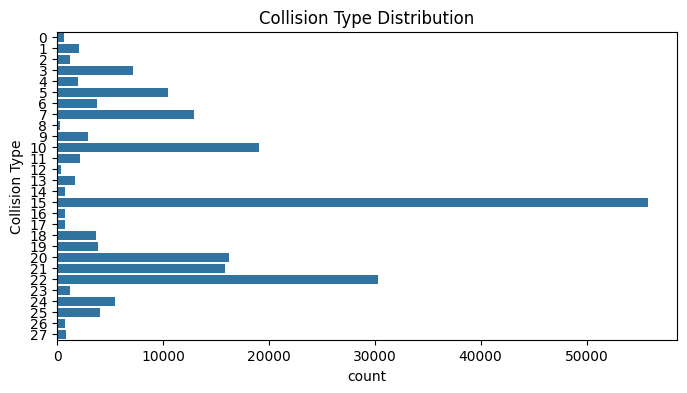

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(y="Collision Type", data=df)
plt.title("Collision Type Distribution")
plt.show()


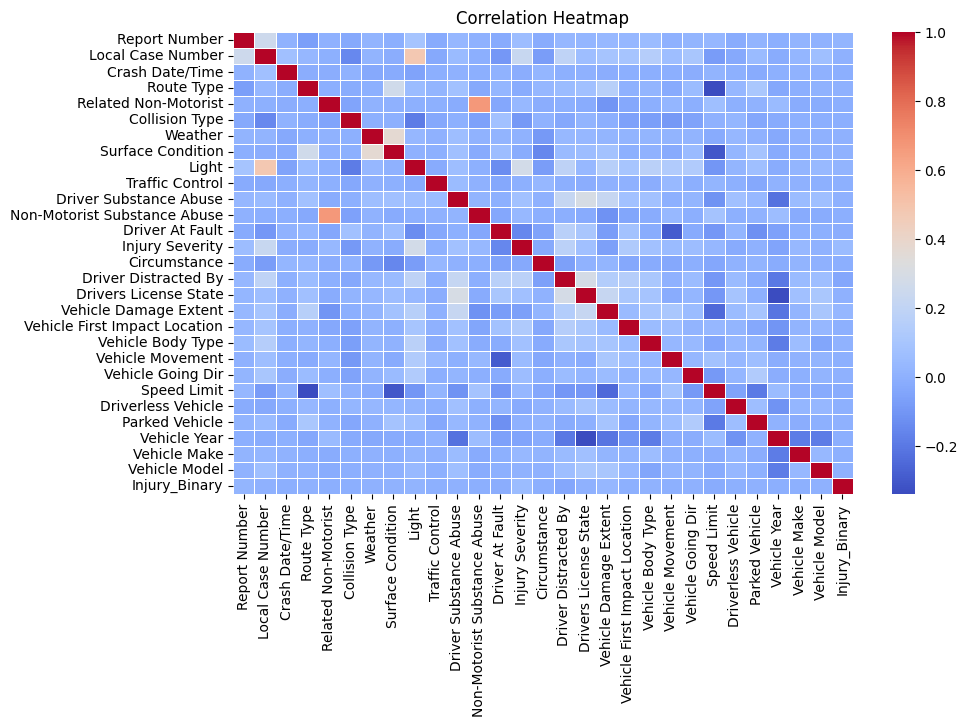

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# OBJECTIVE 2

Severe/Fatal vs Non-Severe Crash Prediction
(Model: Decision Tree)

In [29]:
df["Severe_Binary"] = df["Injury Severity"].apply(
    lambda x: 1 if x in [6, 7, 8, 9] else 0
)

# Check class distribution
df["Severe_Binary"].value_counts()


Severe_Binary
0    190554
1     16530
Name: count, dtype: int64

In [30]:
y2 = df["Severe_Binary"]


In [31]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y2,
    test_size=0.2,
    random_state=42,
    stratify=y2
)


In [32]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(
    max_depth=6,
    class_weight="balanced",
    random_state=42
)

model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("OBJECTIVE 2: Severe/Fatal Crash Prediction")
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred2))
print("Classification Report:\n", classification_report(y_test2, y_pred2))


OBJECTIVE 2: Severe/Fatal Crash Prediction
Accuracy: 0.6738537315595046
Confusion Matrix:
 [[25577 12534]
 [  974  2332]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.67      0.79     38111
           1       0.16      0.71      0.26      3306

    accuracy                           0.67     41417
   macro avg       0.56      0.69      0.52     41417
weighted avg       0.90      0.67      0.75     41417



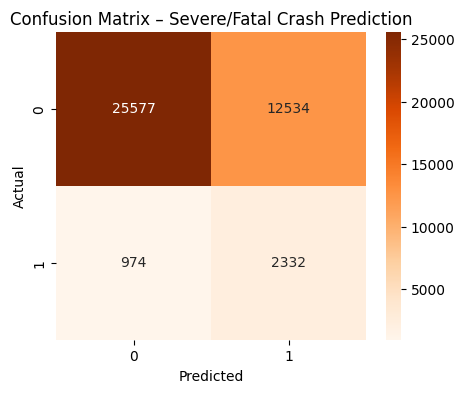

In [34]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test2, y_pred2),
            annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix – Severe/Fatal Crash Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Objective 3

Driver Distraction Prediction 
(Model: Random Forest)

In [35]:
df["Distracted_Binary"] = df["Driver Distracted By"].apply(
    lambda x: 0 if x == 0 else 1
)

df["Distracted_Binary"].value_counts()

Distracted_Binary
1    206950
0       134
Name: count, dtype: int64

In [36]:
y3 = df["Distracted_Binary"]

In [37]:
feature_cols_obj3 = [
    "Collision Type",
    "Weather",
    "Surface Condition",
    "Light",
    "Traffic Control",
    "Driver Substance Abuse",
    "Driver At Fault",
    "Vehicle Damage Extent"
]

X3 = df[feature_cols_obj3]


In [38]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, y3,
    test_size=0.2,
    random_state=42,
    stratify=y3
)


In [39]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)

model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)


In [40]:
print("OBJECTIVE 3: Driver Distraction Prediction")
print("Accuracy:", accuracy_score(y_test3, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test3, y_pred3))
print("Classification Report:\n", classification_report(y_test3, y_pred3))


OBJECTIVE 3: Driver Distraction Prediction
Accuracy: 0.8842504285679793
Confusion Matrix:
 [[   13    14]
 [ 4780 36610]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.48      0.01        27
           1       1.00      0.88      0.94     41390

    accuracy                           0.88     41417
   macro avg       0.50      0.68      0.47     41417
weighted avg       1.00      0.88      0.94     41417



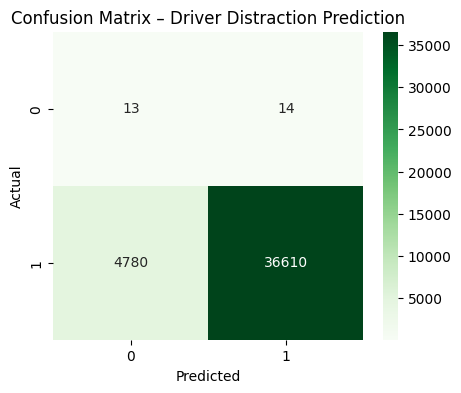

In [41]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test3, y_pred3),
            annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix – Driver Distraction Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


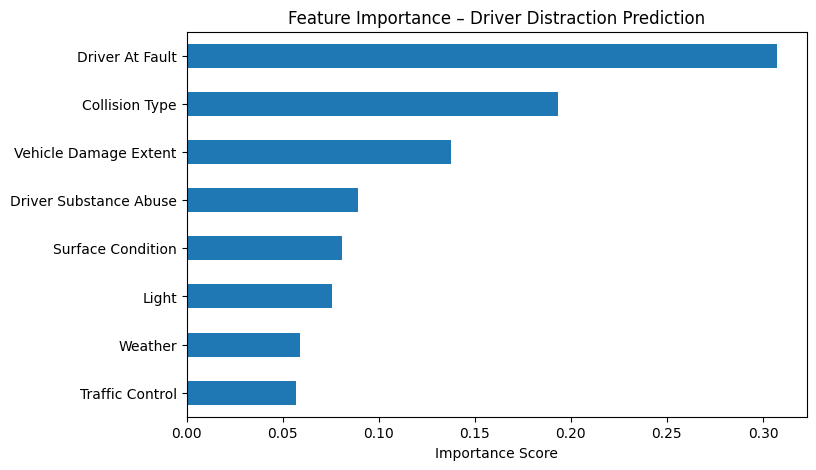

In [42]:
import pandas as pd

feature_importance = pd.Series(
    model3.feature_importances_,
    index=feature_cols_obj3
).sort_values(ascending=True)

plt.figure(figsize=(8,5))
feature_importance.plot(kind="barh")
plt.title("Feature Importance – Driver Distraction Prediction")
plt.xlabel("Importance Score")
plt.show()
